A dataframe que temos em questão possui uma diversidade de dados a respeito da economia Nigeriana. Diante desses dados iremos procurar a correlação entre diferentes variáveis econômicas por meio do Python

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/kaggle/input/nigeria-economy-growth-1990-2023/Nigeria Economy.xlsx')

In [4]:
df.head()

,Year,Inflation rate,Unemployment,Government debt,Agriculture,Industry,Services,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1990,0.0740,0.056,0.717,3464.72,11148.10,6849.92,21462.73,217.47,21680.20
1,1991,0.1301,0.041,0.750,3590.84,10910.56,7038.21,21539.61,218.28,21757.90
2,1992,0.4460,0.041,0.702,3674.79,11578.98,7283.32,22537.10,228.45,22765.55
3,1993,0.5720,0.041,0.710,3743.67,10790.31,7544.10,22078.07,224.17,22302.24
4,1994,0.5703,0.041,0.559,3839.68,10151.70,7685.48,21676.85,220.62,21897.47


A primeira análise que será feita é uma análise da correlação entre Inflação e Desemprego. A relação entre os dois dados foi prevista na Curva de Phillips, desenvolvida pelo economista Willian Philips que alega que existe um trade off no curto prazo entre inflação e desemprego
![https://pt.wikipedia.org/wiki/Curva_de_Phillips#/media/Ficheiro:NAIRU-SR-and-LR.svg](http://)

In [8]:
X = df['Unemployment']  
y = df['Inflation rate']  

Temos a variável dependente a taxa de inflação, enquanto a variável independente é a taxa de desemprego

In [10]:
# Adicionar uma constante para a regressão (intercepto)
X = sm.add_constant(X)

Introduzindo um termo constante (intercepto) à equação da regressão linear

In [11]:
# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

ajustando o modelo aos dados, calculando os coeficientes da regressão para minimizar a soma dos quadrados dos resíduos. 

In [12]:
# Imprimir os resultados da regressão
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Inflation rate   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.3084
Date:                Wed, 29 Nov 2023   Prob (F-statistic):              0.583
Time:                        23:53:17   Log-Likelihood:                 15.009
No. Observations:                  34   AIC:                            -26.02
Df Residuals:                      32   BIC:                            -22.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.038      5.180   

**R-squared: 0.010**: Este é o coeficiente de determinação, indicando que aproximadamente 1% da variação na taxa de inflação é explicada pela variação na taxa de desemprego.
**Adj. R-squared**: -0.021: indica que o modelo não se ajusta bem aos dados.
**F-statistic**: 0.3084: É um teste estatístico para a significância global do modelo. Um valor baixo pode indicar que o modelo como um todo pode não ser significativo.
Coeficientes:
**const (intercepto)**: 0.1949: Este é o valor estimado da taxa de inflação quando a taxa de desemprego é "zero".
**Unemployment:** -0.1434: Representa a mudança esperada na taxa de inflação para uma unidade de mudança na taxa de desemprego. No entanto, como o p-valor é alto (0.583), isso sugere que a taxa de desemprego pode não ser um preditor significativo da taxa de inflação.

Diagnóstico do Modelo:
Omnibus, Jarque-Bera, Skew, Kurtosis: São testes estatísticos para verificar se os resíduos da regressão (diferenças entre os valores observados e os valores previstos) têm uma distribuição normal. Valores baixos em Prob(Omnibus) e Prob(JB) são desejáveis para indicar normalidade. Aqui, esses valores são baixos, o que pode sugerir que os resíduos não têm uma distribuição normal.

Durbin-Watson: Testa a autocorrelação dos resíduos. O valor de 0.507 sugere forte autocorrelação positiva.

Cond. No.: Testa multicolinearidade. Quanto maior o número, maior a multicolinearidade entre as variáveis independentes. Um valor próximo a 1 indica baixa multicolinearidade. Neste caso, o valor é 9.48, o que não sugere problemas graves de multicolinearidade.

**Em resumo, a taxa de desemprego pode não ser um bom preditor da taxa de inflação para os dados , considerando os p-valores altos e o baixo R-quadrado.**

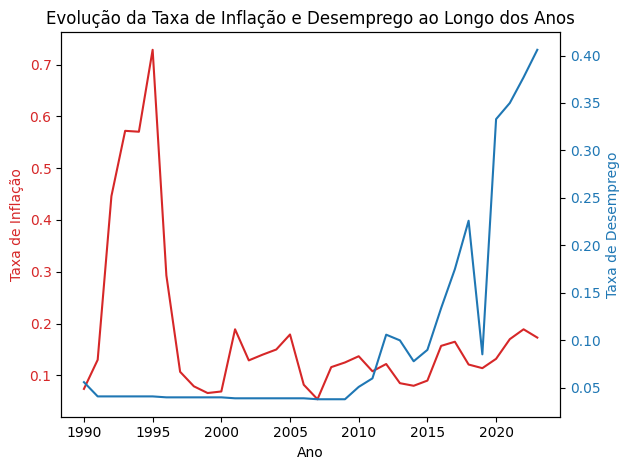

In [17]:
years = df['Year']
inflation_rate = df['Inflation rate']
unemployment_rate = df['Unemployment']
# Criar o gráfico com duas subtramas (um para cada taxa)
fig, ax1 = plt.subplots()

# Inflação
color = 'tab:red'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Taxa de Inflação', color=color)
ax1.plot(years, inflation_rate, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Desemprego
ax2 = ax1.twinx()  # Compartilhar o eixo 
color = 'tab:blue'
ax2.set_ylabel('Taxa de Desemprego', color=color)
ax2.plot(years, unemployment_rate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Configurar o título e exibir o gráfico
plt.title('Evolução da Taxa de Inflação e Desemprego ao Longo dos Anos')
fig.tight_layout()  # Evitar sobreposição dos rótulos
plt.show()